In [ ]:
#Carpeta para los datos
!mkdir data

In [ ]:
!unzip /content/data/archive.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
 

In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
train = "/content/data/train"
test  = "/content/data/test"
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(train):
    files = gb.glob(pathname= str(train+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 4830 in folder sad
For training data, found 7215 in folder happy
For training data, found 3995 in folder angry
For training data, found 436 in folder disgust
For training data, found 4097 in folder fear
For training data, found 3171 in folder surprise
For training data, found 4965 in folder neutral


In [ ]:
for folder in os.listdir(test):
    files = gb.glob(pathname= str(test+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1247 in folder sad
For testing data, found 1774 in folder happy
For testing data, found 958 in folder angry
For testing data, found 111 in folder disgust
For testing data, found 1024 in folder fear
For testing data, found 831 in folder surprise
For testing data, found 1233 in folder neutral


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img


In [ ]:
class_names = ['angry','disgust','fear','happy','neutral','sad', 'surprise']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


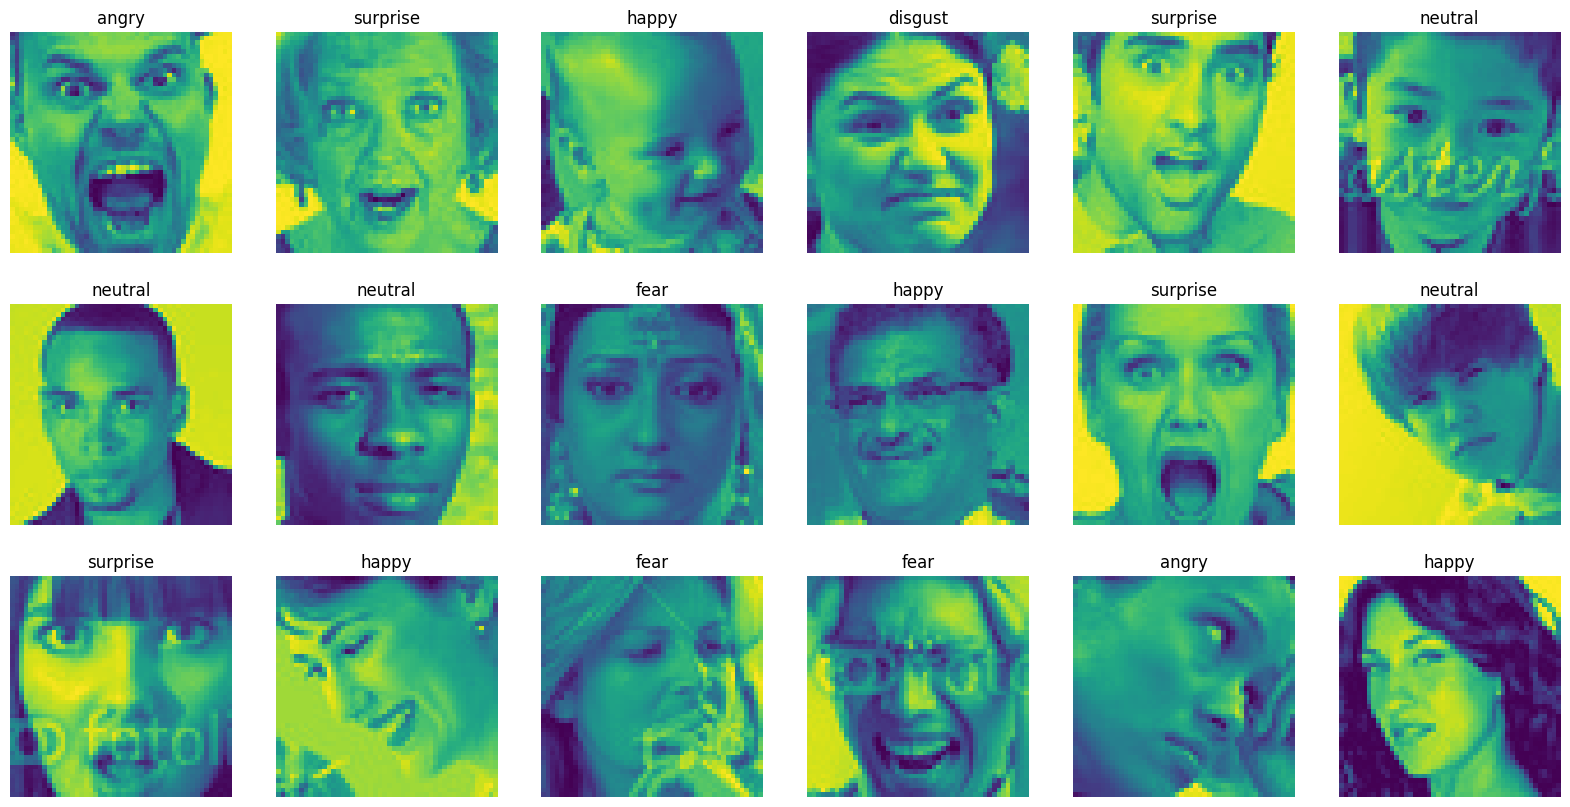

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/data/train", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
## model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('modelDetection.h5')  # creates a HDF5 file 'my_model.h5'

NameError: name 'classifier' is not defined

In [ ]:
# two tasks :
# normalize the image : 0 to 1
# add another dimention to the data : (28709, 48, 48 , 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#reshape the train data

numOfImages = X_train.shape[0] # 28709
X_train = X_train.reshape(numOfImages,48,48,1) # add another dim for gray image

print(X_train[0])
print(X_train.shape)

# the same for the test
numOfImages = X_test.shape[0]
X_test = X_test.reshape(numOfImages,48,48,1)
print(X_test.shape)

[[[0.74509805]
  [0.7411765 ]
  [0.73333335]
  ...
  [0.62352943]
  [0.59607846]
  [0.60784316]]

 [[0.7254902 ]
  [0.7254902 ]
  [0.7176471 ]
  ...
  [0.63529414]
  [0.6313726 ]
  [0.6039216 ]]

 [[0.7019608 ]
  [0.68235296]
  [0.6509804 ]
  ...
  [0.6156863 ]
  [0.627451  ]
  [0.6       ]]

 ...

 [[0.78039217]
  [0.78431374]
  [0.78431374]
  ...
  [0.41960785]
  [0.42745098]
  [0.4117647 ]]

 [[0.7764706 ]
  [0.7882353 ]
  [0.78431374]
  ...
  [0.43529412]
  [0.43529412]
  [0.43529412]]

 [[0.76862746]
  [0.78431374]
  [0.77254903]
  ...
  [0.44705883]
  [0.43529412]
  [0.45490196]]]
(28709, 48, 48, 1)
(7178, 48, 48, 1)


In [ ]:
# convert the lables to categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print("To categorical:")
print(y_train)
print(y_train.shape)
print(y_train[0])

To categorical:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(28709, 7)
[1. 0. 0. 0. 0. 0. 0.]


In [ ]:
input_shape = X_train.shape[1:]
print(input_shape)


(48, 48, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Crear los modelos iniciales
#Usan sigmoid como salida (en lugar de softmax) para mostrar como podria funcionar con dicha funcion de activacion.
#Sigmoid regresa siempre datos entre 0 y 1. Realizamos el entrenamiento para al final considerar que si la respuesta se
#acerca a 0, es un gato, y si se acerca a 1, es un perro.

modeloDenso = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                   

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
batch=32
epochs=30

stepsPerEpoch = np.ceil(len(X_train)/batch)
validationSteps = np.ceil(len(X_test)/batch)

stopEarly = EarlyStopping(monitor='val_accuracy' , patience=5)

In [ ]:
# train the model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test,y_test),
                    shuffle=True,
                    callbacks=[stopEarly])


Epoch 1/30
898/898 [==============================] - 57s 51ms/step - loss: 1.7754 - accuracy: 0.2730 - val_loss: 1.6418 - val_accuracy: 0.3370
Epoch 2/30
898/898 [==============================] - 43s 48ms/step - loss: 1.4864 - accuracy: 0.4037 - val_loss: 1.4270 - val_accuracy: 0.4344
Epoch 3/30
898/898 [==============================] - 46s 52ms/step - loss: 1.3562 - accuracy: 0.4627 - val_loss: 1.3133 - val_accuracy: 0.4847
Epoch 4/30
898/898 [==============================] - 44s 49ms/step - loss: 1.2469 - accuracy: 0.5163 - val_loss: 1.2445 - val_accuracy: 0.5219
Epoch 5/30
898/898 [==============================] - 44s 49ms/step - loss: 1.1593 - accuracy: 0.5525 - val_loss: 1.1744 - val_accuracy: 0.5450
Epoch 6/30
898/898 [==============================] - 46s 52ms/step - loss: 1.0808 - accuracy: 0.5852 - val_loss: 1.2063 - val_accuracy: 0.5450
Epoch 7/30
898/898 [==============================] - 46s 52ms/step - loss: 0.9983 - accuracy: 0.6217 - val_loss: 1.1385 - val_accuracy:

In [ ]:
# show the result based on pyplot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# show the charts
epochs = range(len(acc))


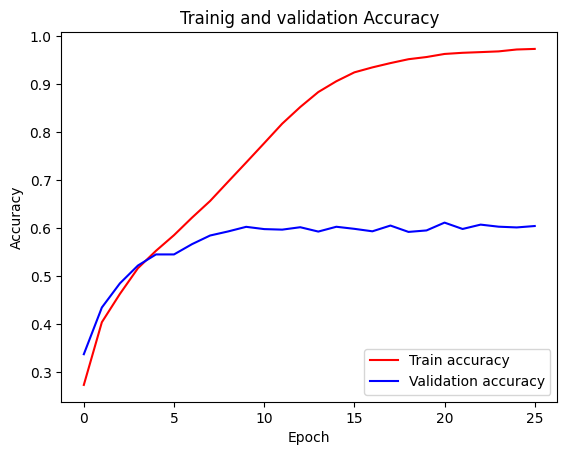

In [ ]:
# show train and validation train chart

plt.plot(epochs, acc , 'r' , label="Train accuracy")
plt.plot(epochs, val_acc , 'b' , label="Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Trainig and validation Accuracy")
plt.legend(loc='lower right')
plt.show()


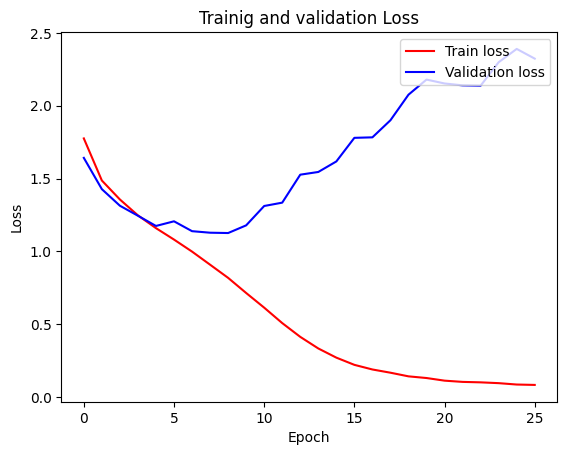

In [ ]:
# show loss and validation loss chart

plt.plot(epochs, loss , 'r' , label="Train loss")
plt.plot(epochs, val_loss , 'b' , label="Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Trainig and validation Loss")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Guardar el modelo
model.save("/content/Model-Emotion")